# Import libraries

In [ ]:
import pm4py
import numpy as np
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.objects.conversion.process_tree import converter as pt_converter
from pm4py.visualization.petri_net import visualizer as pn_visualizer
import networkx as nx
import matplotlib.pyplot as plt
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go



C:\Users\felip\AppData\Local\Temp\ipykernel_6000\2830308410.py:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\felip\AppData\Local\Temp\ipykernel_6000\2830308410.py:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


# Data Load

In [2]:
## Take 14 mins - 30 mins  Dataset of 8gb 
log = pm4py.read_xes('Data/CryptoKitties.xes')
## Check column structure log.columns 

c:\Users\felip\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 1997604/1997604 [20:09<00:00, 1651.64it/s] 


# Exploratory Analysis 

## Dataset Profile

2530464
1993863
1997605
2017-11-23 06:41:19+00:00
2021-04-15 09:44:22+00:00
18059296
1997604
1993863
-3741


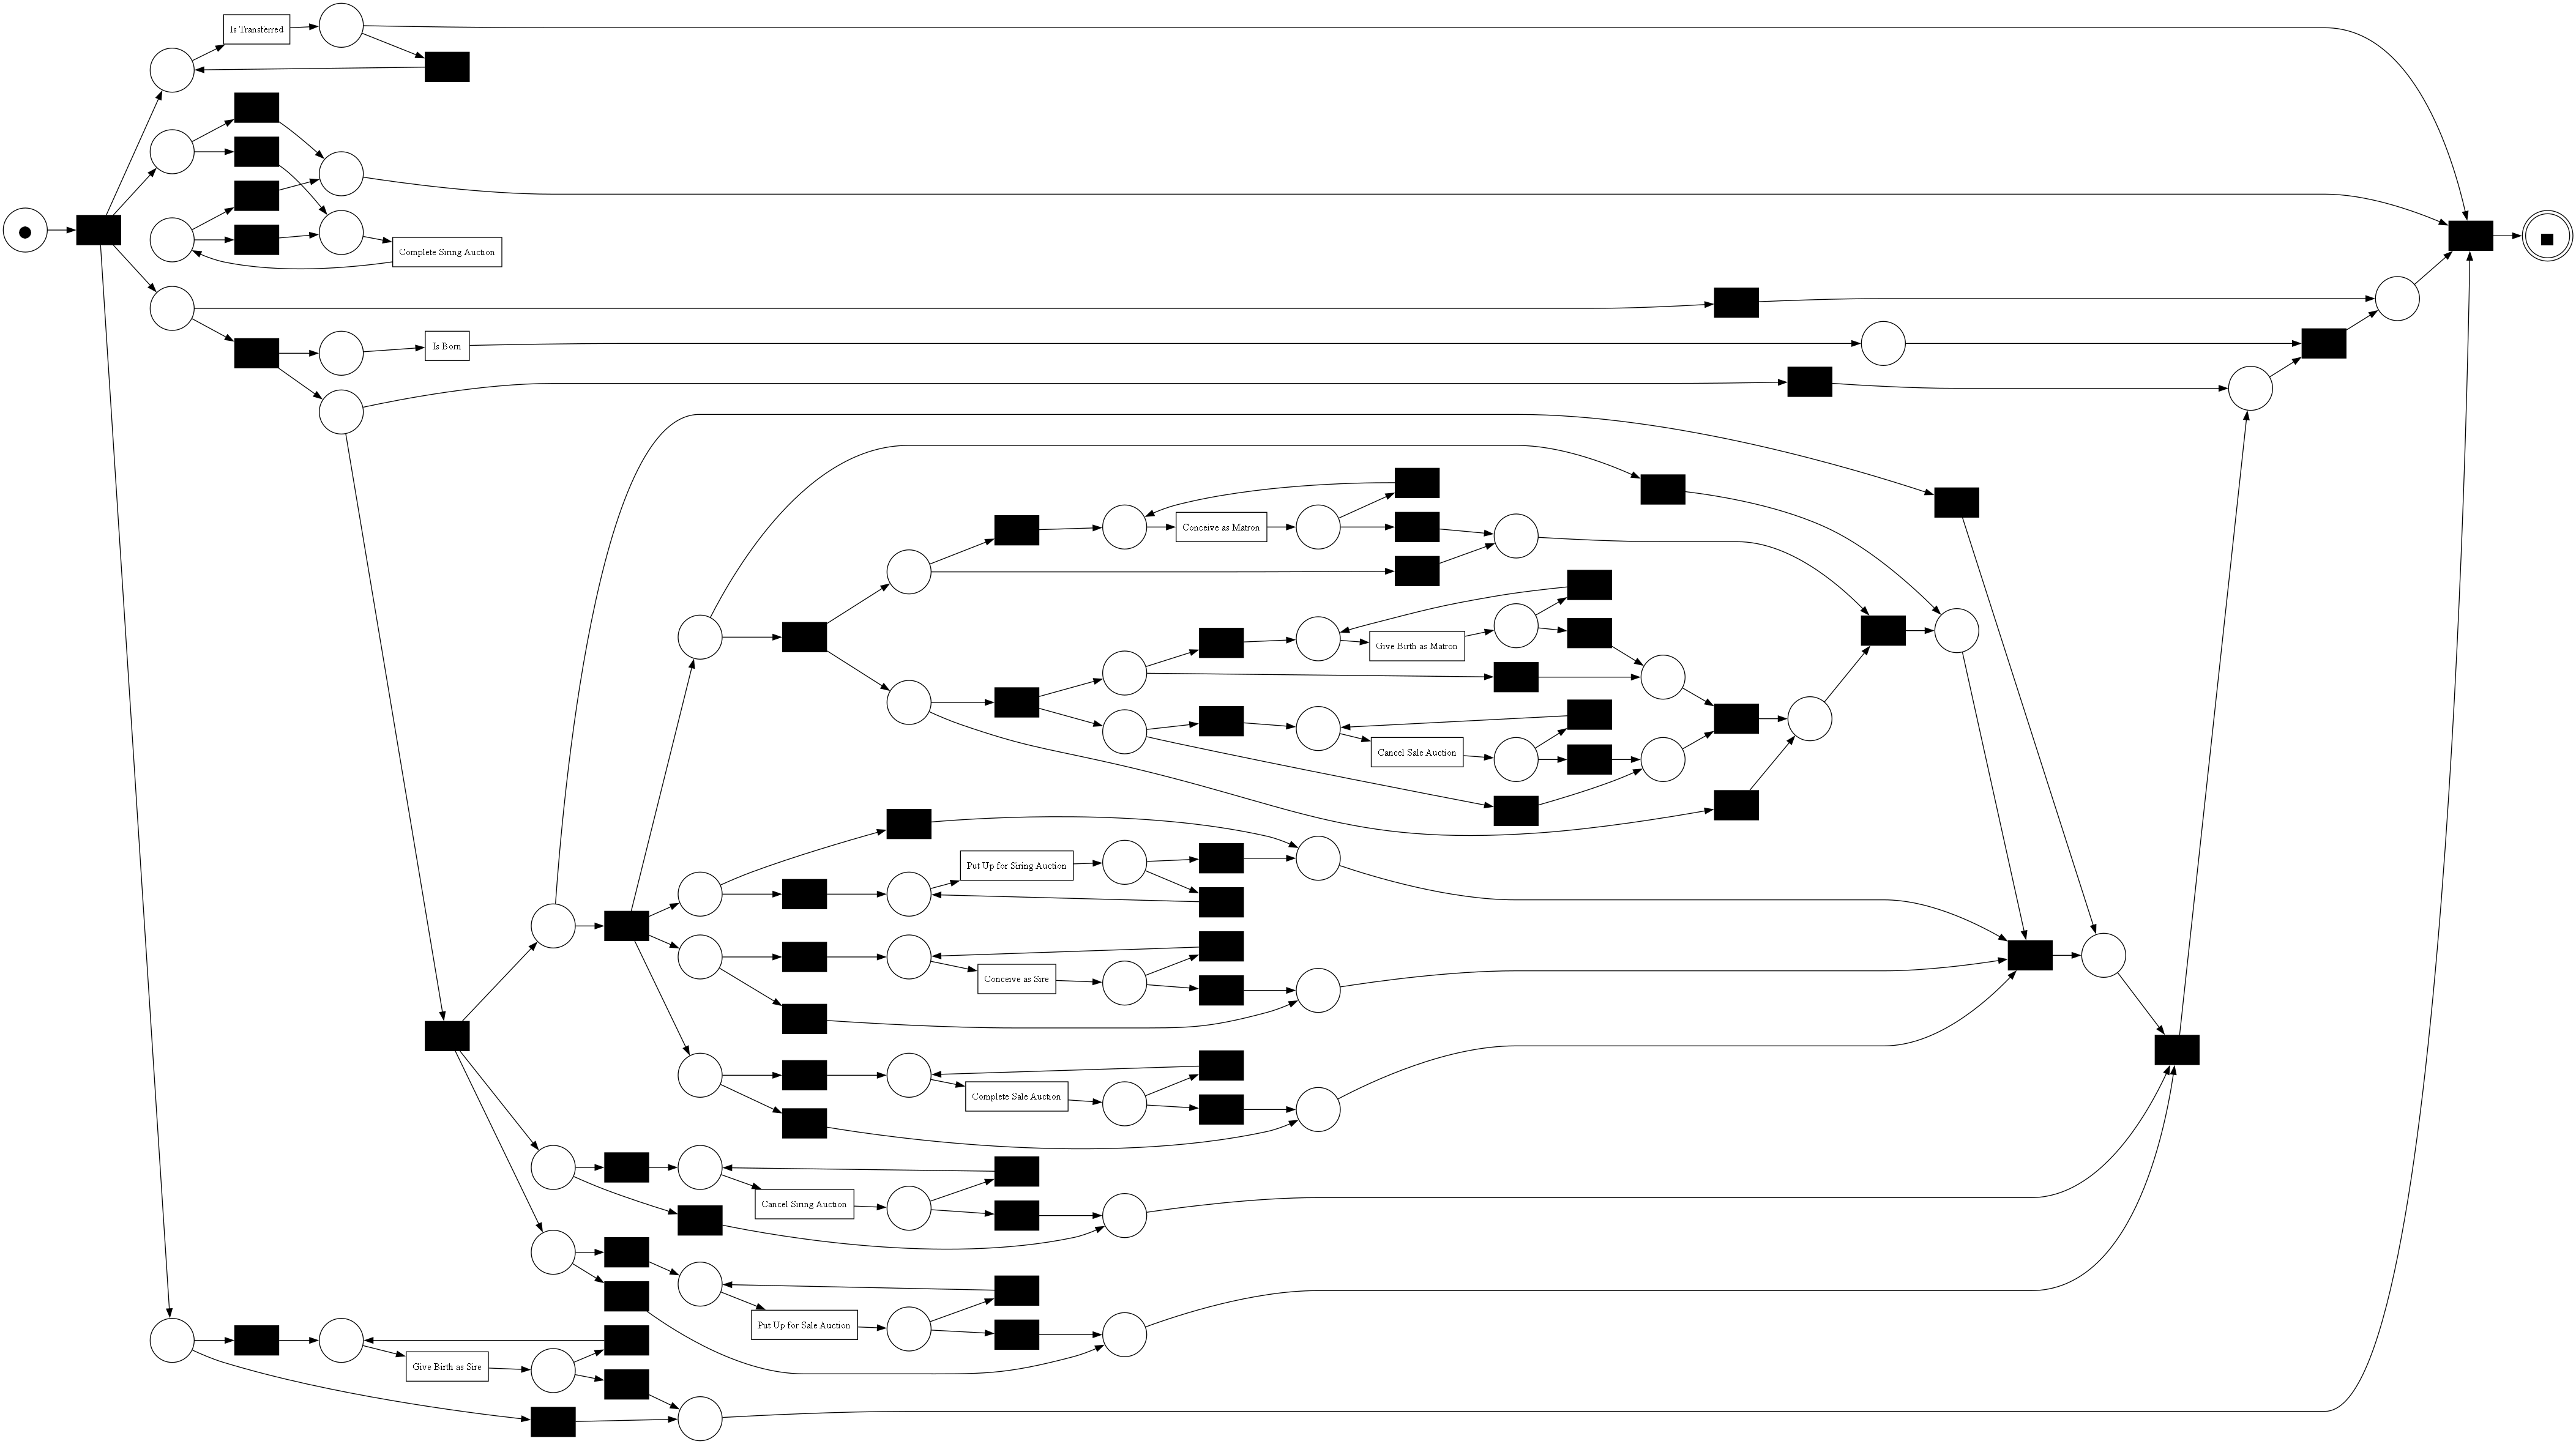

In [3]:
print(len(log['blockNumber'].unique())) # Block Overlapping
print(len(log['case:genes'].unique())) # Kitty Duplication
print(len(log['kittyId'].unique())) # Kitty Duplication
print(min(log['time:timestamp'].unique())) # Transaction in groups 
print(max(log['time:timestamp'].unique())) # Transaction in groups 
print(len(log)) #Reference of blockevents
print(len(log['case:concept:name'].unique())) # Number of unique kitties 1996715
print(len(log['case:genes'].unique()))# Number of unique genes 1993863
print(len(log['case:genes'].unique())-len(log['case:concept:name'].unique())) # shared genes kittens 

process_tree = inductive_miner.apply(log, variant=inductive_miner.Variants.IMf)
# Convert the process tree to a Petri net
net, initial_marking, final_marking = pt_converter.apply(process_tree)
# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

## Descriptive Stats

In [4]:
filtered_log = log[log['blockNumber']>9000000] ## Optional  for faster analysis we reduce the size of the dataset as conveninence. migth be too heavy for some computers
filtered_log['genes'] = filtered_log['case:genes'].astype(str)
filtered_log['isValue'] = filtered_log['genes']=='1528354362908250337'  # This a filter set up here by convinence case can be added later 
kitties_log = filtered_log[filtered_log['genes']=='1528354362908250337']  # This a filter set up here by convinence case can be added later
print(len(filtered_log),len(log))
# Step 1: Create the pivot table
pivot_table = filtered_log.pivot_table(index='genes', columns='concept:name', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)

C:\Users\felip\AppData\Local\Temp\ipykernel_6000\1176864010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_log['genes'] = filtered_log['case:genes'].astype(str)
C:\Users\felip\AppData\Local\Temp\ipykernel_6000\1176864010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_log['isValue'] = filtered_log['genes']=='1528354362908250337'  # This a filter set up here by convinence case can be added later


2242326 18059296


In [ ]:
pivot_table = log.pivot_table(index='case:genes', columns='concept:name', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
average_per_activity = pivot_table.mean(axis=0)
std_per_activity = pivot_table.std(axis=0)

# Step 3: View the results
print("Average number of occurrences per activity (concept:name):")
print(average_per_activity)

average_per_activity.to_csv('average_per_activity.csv')
print("\nStandard deviation of occurrences per activity (concept:name):")
print(std_per_activity)
std_per_activity.to_csv('average_per_activity.csv')

pivot_table = filtered_log.pivot_table(index='case:genes', columns='concept:name', aggfunc='size', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
average_per_activity = pivot_table.mean(axis=0)
std_per_activity = pivot_table.std(axis=0)

# Step 3: View the results
print("Average number of occurrences per activity (concept:name):")
print(average_per_activity)

average_per_activity.to_csv('average_per_activity.csv')
print("\nStandard deviation of occurrences per activity (concept:name):")
print(std_per_activity)
std_per_activity.to_csv('average_per_activity.csv')

Average number of occurrences per activity (concept:name):
concept:name
Cancel Sale Auction          0.072789
Cancel Siring Auction        0.043439
Complete Sale Auction        0.259249
Complete Siring Auction      0.041854
Conceive as Matron           0.591824
Conceive as Sire             0.591824
Give Birth as Matron         0.593955
Give Birth as Sire           0.593955
Is Born                      0.593955
Is Transferred               1.843852
Put Up for Sale Auction      0.269602
Put Up for Siring Auction    0.100379
Total                        5.596678
dtype: float64

Standard deviation of occurrences per activity (concept:name):
concept:name
Cancel Sale Auction          0.354156
Cancel Siring Auction        0.256977
Complete Sale Auction        0.488925
Complete Siring Auction      0.326671
Conceive as Matron           1.805093
Conceive as Sire             1.913482
Give Birth as Matron         1.811559
Give Birth as Sire           1.920176
Is Born                      0.510227


## Selection of columns

In [6]:
filtered_logV2 = log[['blockNumber','kittyId','case:genes','case:concept:name','concept:name','time:timestamp','from','to']]
filtered_logV2['start_timestamp_Rounded'] = filtered_logV2['time:timestamp'].dt.round('10min')
filtered_logV2 = filtered_logV2.drop_duplicates(subset=['case:genes','concept:name','from', 'to', 'start_timestamp_Rounded'])  # Presence of some block duplication. 
filtered_logV2

C:\Users\felip\AppData\Local\Temp\ipykernel_6000\1724077367.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_logV2['start_timestamp_Rounded'] = filtered_logV2['time:timestamp'].dt.round('10min')


,blockNumber,kittyId,case:genes,case:concept:name,concept:name,time:timestamp,from,to,start_timestamp_Rounded
0,4605167,0,-1,0,Give Birth as Sire,2017-11-23 06:41:19+00:00,NaN,NaN,2017-11-23 06:40:00+00:00
1,4605167,NaN,-1,0,Is Transferred,2017-11-23 06:41:19+00:00,0x0000000000000000000000000000000000000000,0x0000000000000000000000000000000000000000,2017-11-23 06:40:00+00:00
2,4605346,1,-1,0,Give Birth as Sire,2017-11-23 07:19:59+00:00,NaN,NaN,2017-11-23 07:20:00+00:00
39,4605371,38,-1,0,Give Birth as Sire,2017-11-23 07:25:02+00:00,NaN,NaN,2017-11-23 07:30:00+00:00
98,4605419,97,-1,0,Give Birth as Sire,2017-11-23 07:35:09+00:00,NaN,NaN,2017-11-23 07:40:00+00:00
...,...,...,...,...,...,...,...,...,...
18059291,12240914,NaN,3471150933283747244,1997602,Is Born,2021-04-14 22:30:03+00:00,NaN,NaN,2021-04-14 22:30:00+00:00
18059292,12240914,NaN,3471150933283747244,1997602,Is Transferred,2021-04-14 22:30:03+00:00,0x0000000000000000000000000000000000000000,0x7e4728c39a21dd20703afbf7c2b1a00c9473d30a,2021-04-14 22:30:00+00:00
18059293,12242211,NaN,3471150933283747244,1997602,Conceive as Sire,2021-04-15 03:22:41+00:00,NaN,NaN,2021-04-15 03:20:00+00:00
18059294,12243795,NaN,7042681979160319013,1997603,Is Born,2021-04-15 09:21:19+00:00,NaN,NaN,2021-04-15 09:20:00+00:00


## Selection of insterest cases

In [7]:
pivot_table_filtered_logV2 = filtered_logV2[filtered_logV2['concept:name'] == 'Is Transferred'].groupby('case:genes').size().reset_index(name='count')
pivot_table_filtered_logV2 = pivot_table_filtered_logV2.sort_values(by='count',ascending=False)
pivot_table_filtered_logV2.to_csv('Count of Transactions.csv')
## Pick of cases of the transaction output ( Many to study )
filtered_logV2['genes'] = filtered_logV2['case:genes'].astype(str)
filtered_logV2['isValue'] = filtered_logV2['genes']=='-3019947904495252141'

pivot_table_filtered_logV2 = filtered_logV2[filtered_logV2['concept:name'] == 'Complete Sale Auction'].groupby('case:concept:name').size().reset_index(name='count')
pivot_table_filtered_logV2 = pivot_table_filtered_logV2.sort_values(by='count',ascending=False)
pivot_table_filtered_logV2.to_csv('Count of Auctions.csv')
## Case 1 of the transaction output
filtered_logV2['isValueCase2'] = ""
filtered_logV2['isValueCase2'] = filtered_logV2['case:concept:name']=='350227'

# ALL DATA

{('Cancel Sale Auction', 'Conceive as Matron'): 22910, ('Cancel Sale Auction', 'Conceive as Sire'): 18882, ('Cancel Sale Auction', 'Give Birth as Sire'): 590, ('Cancel Sale Auction', 'Is Transferred'): 177748, ('Cancel Siring Auction', 'Conceive as Matron'): 18269, ('Cancel Siring Auction', 'Conceive as Sire'): 14798, ('Cancel Siring Auction', 'Give Birth as Matron'): 2, ('Cancel Siring Auction', 'Give Birth as Sire'): 171, ('Cancel Siring Auction', 'Is Born'): 1, ('Cancel Siring Auction', 'Is Transferred'): 51848, ('Complete Sale Auction', 'Is Transferred'): 725753, ('Complete Siring Auction', 'Is Transferred'): 162736, ('Conceive as Matron', 'Complete Sale Auction'): 5, ('Conceive as Matron', 'Conceive as Matron'): 61, ('Conceive as Matron', 'Conceive as Sire'): 20, ('Conceive as Matron', 'Give Birth as Matron'): 1945229, ('Conceive as Matron', 'Give Birth as Sire'): 13673, ('Conceive as Matron', 'Is Born'): 13, ('Conceive as Matron', 'Is Transferred'): 568, ('Conceive as Sire', 'Com

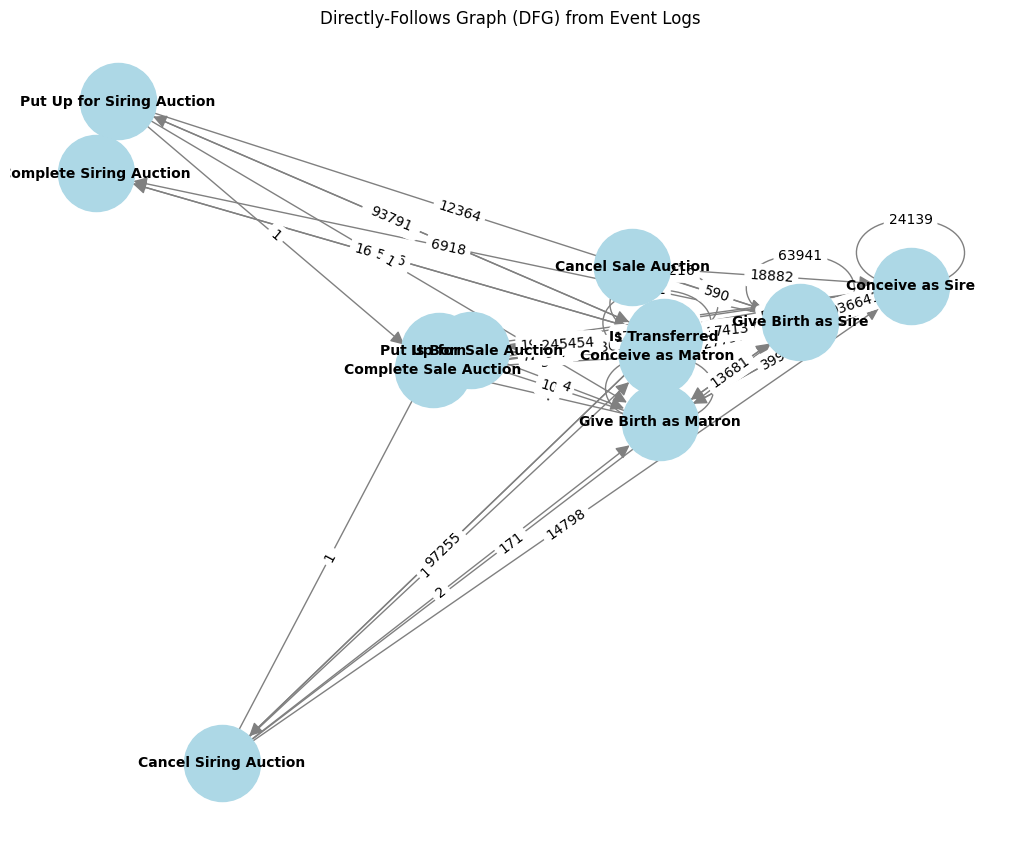

In [8]:
dfg = dfg_discovery.apply(log)
print(dfg)  
G = nx.DiGraph()
for (source, target), frequency in dfg.items():
    G.add_edge(source, target, weight=frequency)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=3000, font_size=10, font_weight='bold', edge_color='gray', arrowsize=20)
edge_labels = {(source, target): f'{frequency}' for (source, target), frequency in dfg.items()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Directly-Follows Graph (DFG) from Event Logs")
plt.show()


In [9]:

nodes = set()  # To store unique nodes
edges = []     # To store the edges (flows between nodes)

for (source, target), frequency in dfg.items():
    nodes.add(source)
    nodes.add(target)
    edges.append((source, target, frequency))

nodes = list(nodes)
import numpy as np
theta = np.linspace(0, 2 * np.pi, len(nodes))
x_coords = np.cos(theta)
y_coords = np.sin(theta)

edge_x = []
edge_y = []

for edge in edges:
    source_idx = nodes.index(edge[0])
    target_idx = nodes.index(edge[1])
    x0, y0 = x_coords[source_idx], y_coords[source_idx]
    x1, y1 = x_coords[target_idx], y_coords[target_idx]
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,  # Use the lists we just populated
    line=dict(width=2, color='gray'),
    hoverinfo='none',
    mode='lines'
)

# Create traces for nodes
node_trace = go.Scatter(
    x=x_coords, y=y_coords,
    text=nodes,  # Node labels
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        size=30,
        color='skyblue',
        line_width=2
    )
)

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Directly-Follows Graph from Event Log',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=50),
        annotations=[dict(text="Process Flow", showarrow=False)],
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Process Flow Visualization"),
    dcc.Graph(figure=fig)  # Render the Plotly figure in Dash
])

if __name__ == '__main__':
    app.run_server(debug=True)


# One Kittie 

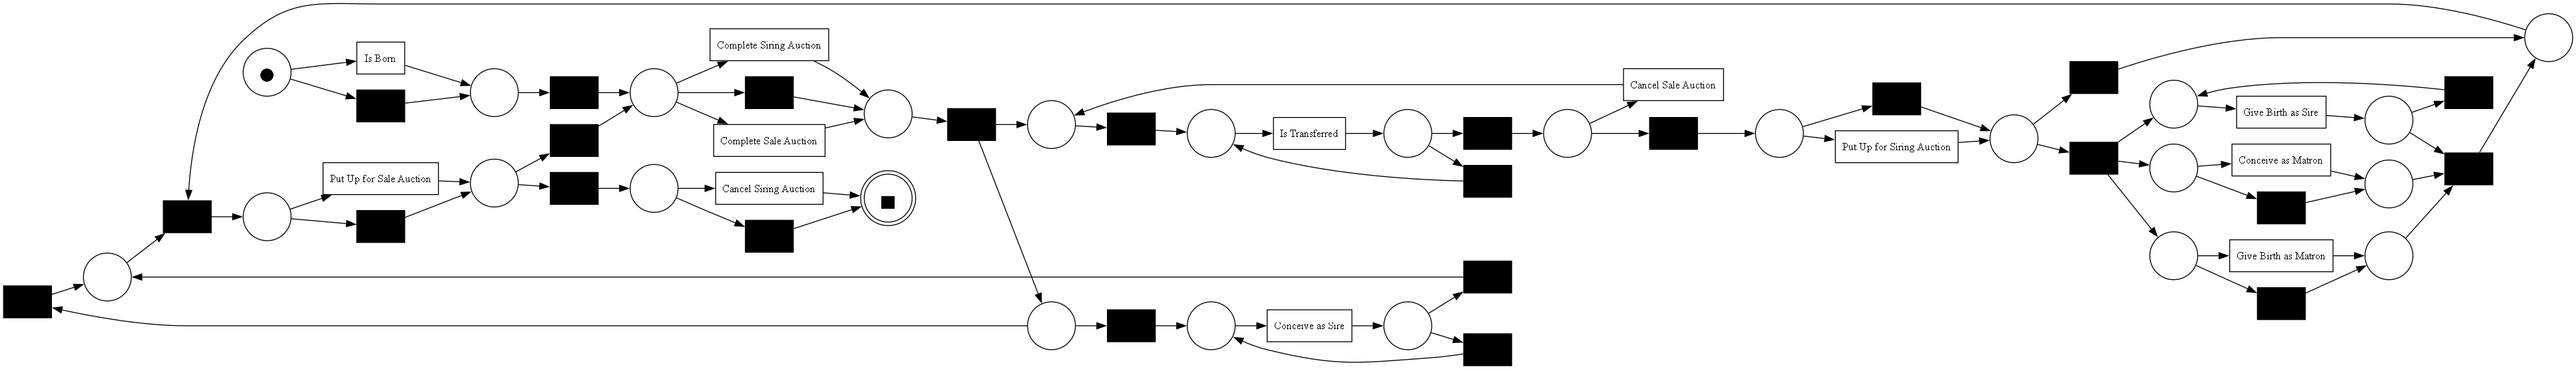

In [10]:
# Discover the process tree using the Inductive Miner
process_tree = inductive_miner.apply(kitties_log, variant=inductive_miner.Variants.IMf)


# Convert the process tree to a Petri net
net, initial_marking, final_marking = pt_converter.apply(process_tree)

# Import Petri net visualizer
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# Visualize the Petri net
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)


In [11]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objects as go
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery

## THIS MAP THE WHOLE KITTY 

# Extract nodes and edges from DFG
nodes = set()  # To store unique nodes
edges = []     # To store the edges (flows between nodes)

# Populate nodes and edges
for (source, target), frequency in dfg.items():
    nodes.add(source)
    nodes.add(target)
    edges.append((source, target, frequency))

# Convert nodes to a list
nodes = list(nodes)

# Step 3: Define coordinates for nodes (circular layout)
import numpy as np
theta = np.linspace(0, 2 * np.pi, len(nodes))
x_coords = np.cos(theta)
y_coords = np.sin(theta)

# Create lists for edge x and y coordinates
edge_x = []
edge_y = []

# Add edges to the trace (connect the nodes)
for edge in edges:
    source_idx = nodes.index(edge[0])
    target_idx = nodes.index(edge[1])
    x0, y0 = x_coords[source_idx], y_coords[source_idx]
    x1, y1 = x_coords[target_idx], y_coords[target_idx]

    # Append coordinates to edge_x and edge_y
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Create traces for edges
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,  # Use the lists we just populated
    line=dict(width=2, color='gray'),
    hoverinfo='none',
    mode='lines'
)

# Create traces for nodes
node_trace = go.Scatter(
    x=x_coords, y=y_coords,
    text=nodes,  # Node labels
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        size=30,
        color='skyblue',
        line_width=2
    )
)

# Step 4: Create a Plotly figure for Dash
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Directly-Follows Graph from Event Log',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=50),
        annotations=[dict(text="Process Flow", showarrow=False)],
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

# Step 5: Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the Dash app
app.layout = html.Div([
    html.H1("Process Flow Visualization"),
    dcc.Graph(figure=fig)  # Render the Plotly figure in Dash
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [25]:

# Calculate the frequency of transitions (how many times each transition occurs)
df_grouped = kitties_log.groupby(['from', 'to']).size().reset_index(name='count')

# Filter the DataFrame to only include transitions where count > 1
df_filtered = df_grouped[df_grouped['count'] >= 4]

# Extract unique nodes from the filtered 'from' and 'to' columns
nodes = set(df_filtered['from']).union(set(df_filtered['to']))

# Create edges by using the 'from', 'to', and 'count' from df_filtered
edges = list(zip(df_filtered['from'], df_filtered['to'], df_filtered['count']))

# Convert nodes to a list for easy indexing
nodes = list(nodes)

# Step 3: Define coordinates for nodes (using a circular layout for simplicity)
theta = np.linspace(0, 2 * np.pi, len(nodes))
x_coords = np.cos(theta)
y_coords = np.sin(theta)

# Create lists for edge x and y coordinates
edge_x = []
edge_y = []

# Add edges to the trace (connect the nodes)
for edge in edges:
    source_idx = nodes.index(edge[0])
    target_idx = nodes.index(edge[1])
    x0, y0 = x_coords[source_idx], y_coords[source_idx]
    x1, y1 = x_coords[target_idx], y_coords[target_idx]

    # Append coordinates to edge_x and edge_y
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Create traces for edges with transaction count
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='gray'),
    hoverinfo='text',
    mode='lines',
    text=[f'{source} → {target}: {count} times' for source, target, count in edges]  # Display count in hover text
)

# Create traces for nodes
node_trace = go.Scatter(
    x=x_coords, y=y_coords,
    text=nodes,  # Node labels
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        size=30,
        color='skyblue',
        line_width=2
    )
)

# Step 4: Create a Plotly figure for Dash
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Directly-Follows Graph (Transactions > 4)',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=50),
        annotations=[dict(text="Process Flow", showarrow=False)],
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

# Step 5: Create the Dash app
app = dash.Dash(__name__)

# Define the layout of the Dash app
app.layout = html.Div([
    html.H1("Process Flow Visualization (Transactions > 1)"),
    dcc.Graph(figure=fig)  # Render the Plotly figure in Dash
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)



In [13]:
# List of addresses to filter for kitty 1528354362908250337
addresses = [
    "0x7891f796a5d43466fc29f102069092aef497a290",
    "0xb1690c08e213a35ed9bab7b318de14420fb57d8c",
    "0xbea7dc107395063adb49b9360115a330a975a70e",
    "0x09191d18729da57a83a9afc8ace0c8d7d104e118"
]

# Filter the DataFrame based on 'from' and 'to' columns
filtered_kitties_log = kitties_log[
    (kitties_log['from'].isin(addresses)) & (kitties_log['to'].isin(addresses))
]

# Select only the 'from', 'to', and 'start_timestamp' columns
result = filtered_kitties_log[['from', 'to', 'time:timestamp']]
result.sort_values(by='time:timestamp', ascending=False)

,from,to,time:timestamp
13477453,0x7891f796a5d43466fc29f102069092aef497a290,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-12-27 21:52:35+00:00
13477472,0xbea7dc107395063adb49b9360115a330a975a70e,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-24 18:28:03+00:00
13477370,0xbea7dc107395063adb49b9360115a330a975a70e,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-24 14:59:26+00:00
13477436,0xbea7dc107395063adb49b9360115a330a975a70e,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-24 03:27:18+00:00
13477418,0xbea7dc107395063adb49b9360115a330a975a70e,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-23 18:57:02+00:00
13477425,0xbea7dc107395063adb49b9360115a330a975a70e,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-22 22:40:07+00:00
13477500,0x7891f796a5d43466fc29f102069092aef497a290,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-18 08:55:02+00:00
13477479,0x7891f796a5d43466fc29f102069092aef497a290,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-18 08:55:02+00:00
13477489,0x7891f796a5d43466fc29f102069092aef497a290,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2020-10-15 00:15:57+00:00
13477369,0x09191d18729da57a83a9afc8ace0c8d7d104e118,0xbea7dc107395063adb49b9360115a330a975a70e,2020-09-01 22:21:58+00:00


# FILTERED LOGV2
# Case 1 Market Manipulation - Incresing supply


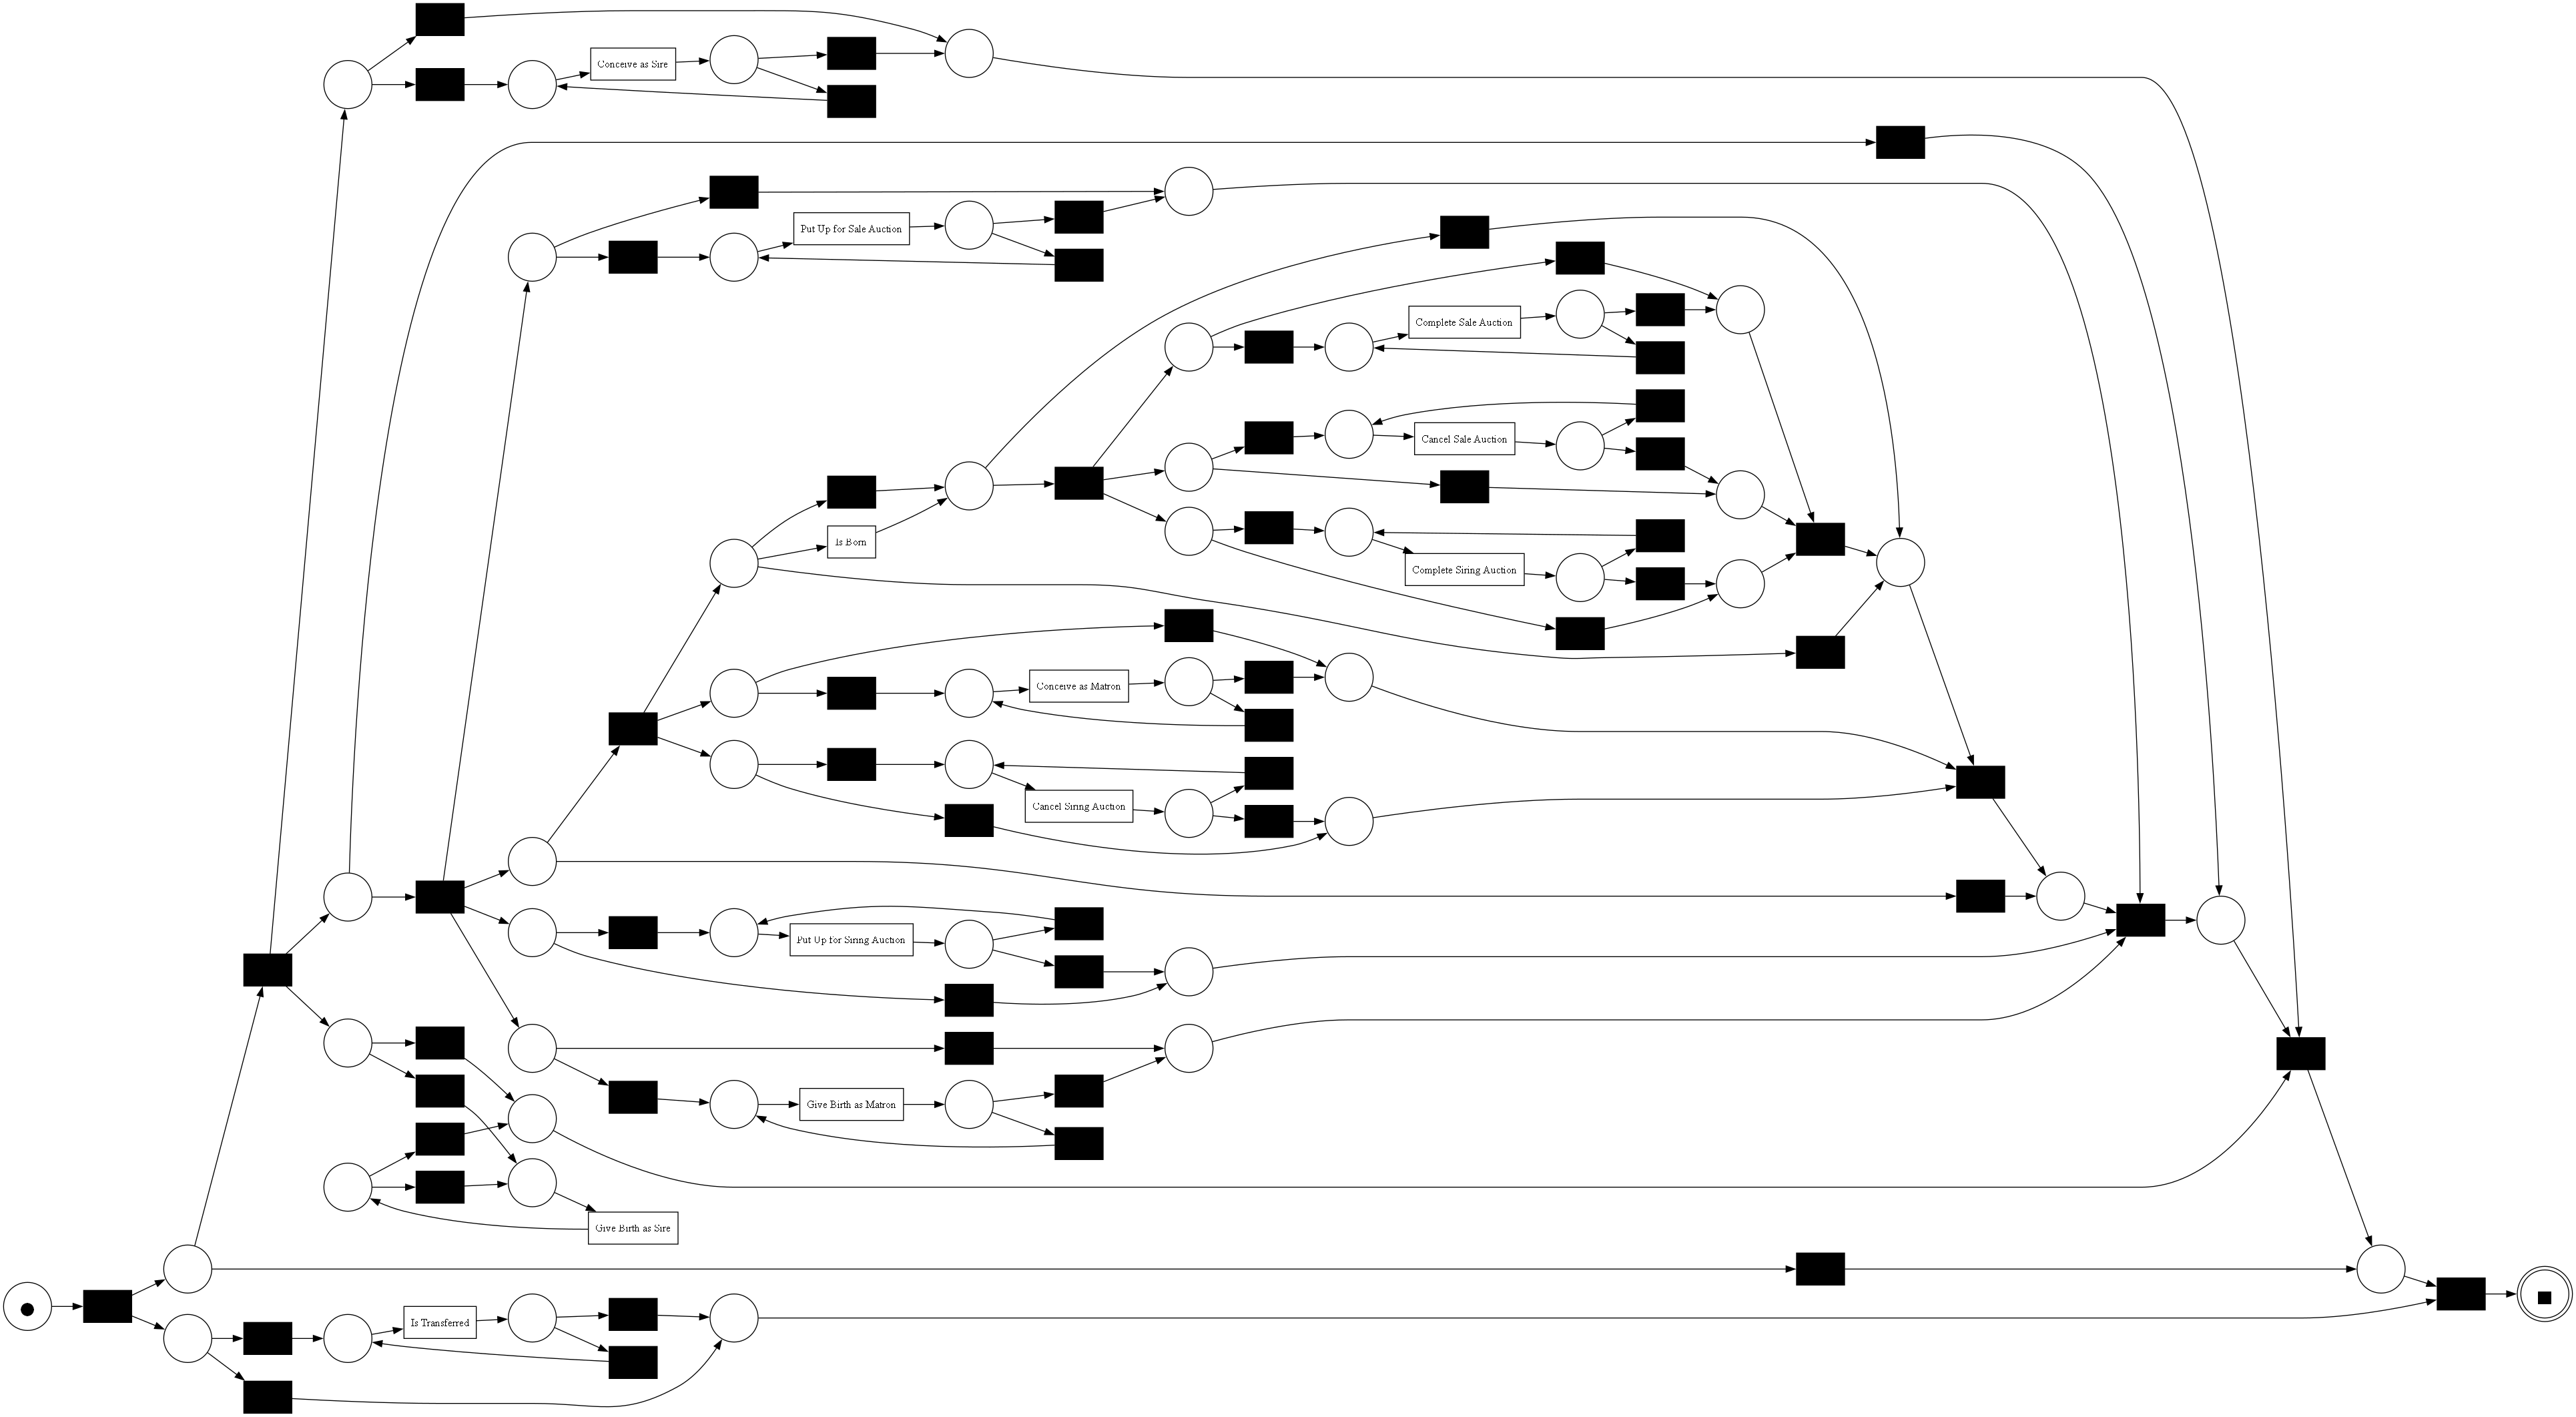

In [14]:

process_tree = inductive_miner.apply(filtered_logV2, variant=inductive_miner.Variants.IMf)
net, initial_marking, final_marking = pt_converter.apply(process_tree)
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

In [15]:

pivot_table_filtered_logV2 = filtered_logV2[filtered_logV2['concept:name'] == 'Is Transferred'].groupby('case:genes').size().reset_index(name='count')
pivot_table_filtered_logV2 = pivot_table_filtered_logV2.sort_values(by='count',ascending=False)
pivot_table_filtered_logV2.to_csv('Count of Transactions.csv')
filtered_logV2['genes'] = filtered_logV2['case:genes'].astype(str)
filtered_logV2['isValue'] = filtered_logV2['genes']=='-3019947904495252141'

pivot_table_filtered_logV2 = filtered_logV2[filtered_logV2['concept:name'] == 'Complete Sale Auction'].groupby('case:concept:name').size().reset_index(name='count')
pivot_table_filtered_logV2 = pivot_table_filtered_logV2.sort_values(by='count',ascending=False)
pivot_table_filtered_logV2.to_csv('Count of Auctions.csv')
filtered_logV2['isValueCase2'] = ""
filtered_logV2['isValueCase2'] = filtered_logV2['case:concept:name']=='350227'

In [16]:
aux=filtered_logV2[filtered_logV2['isValue']]


In [17]:
df_grouped = filtered_logV2[filtered_logV2['isValue']]

# Calculate the frequency of transitions (how many times each transition occurs)
df_grouped = df_grouped.groupby(['from', 'to']).size().reset_index(name='count')

# Filter the DataFrame to only include transitions where count > 1
df_filtered = df_grouped[df_grouped['count'] >= 10]

# Extract unique nodes from the filtered 'from' and 'to' columns
nodes = set(df_filtered['from']).union(set(df_filtered['to']))
edges = list(zip(df_filtered['from'], df_filtered['to'], df_filtered['count']))
nodes = list(nodes)
theta = np.linspace(0, 2 * np.pi, len(nodes))
x_coords = np.cos(theta)
y_coords = np.sin(theta)

# Create lists for edge x and y coordinates
edge_x = []
edge_y = []

# Add edges to the trace (connect the nodes)
for edge in edges:
    source_idx = nodes.index(edge[0])
    target_idx = nodes.index(edge[1])
    x0, y0 = x_coords[source_idx], y_coords[source_idx]
    x1, y1 = x_coords[target_idx], y_coords[target_idx]

    # Append coordinates to edge_x and edge_y
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Create traces for edges with transaction count
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='gray'),
    hoverinfo='text',
    mode='lines',
    text=[f'{source} → {target}: {count} times' for source, target, count in edges]  # Display count in hover text
)

# Create traces for nodes
node_trace = go.Scatter(
    x=x_coords, y=y_coords,
    text=nodes,  # Node labels
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        size=30,
        color='skyblue',
        line_width=2
    )
)

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Directly-Follows Graph (Transactions > 10)',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=50),
        annotations=[dict(text="Process Flow", showarrow=False)],
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

app = dash.Dash(__name__)
app.layout = html.Div([
    html.H1("Process Flow Visualization (Transactions > 10)"),
    dcc.Graph(figure=fig)  # Render the Plotly figure in Dash
])

if __name__ == '__main__':
    app.run_server(debug=True)


In [18]:
BestCase = filtered_logV2[filtered_logV2['isValue']].sort_values(by='time:timestamp', ascending=False)
BestCase.to_csv('transactions market manipulation.csv')

In [19]:
# https://eth.tokenview.io/en/tx/0x3d0de9a027400e01085bffb921f4b0614bc75b2a0677d7588e7a81baec18633b 0.055 ETH
# https://eth.tokenview.io/en/tx/0x8703ba8426c5b0f29082f12380e8c06ae71ee1f229c4c66e416c5574efc8c64b 0.051 ETH
# https://www.cryptokitties.co/kitty/995907

# List of addresses to filter for kitty -3019947904495252141
addresses = [
    "0xbdc18219ebb537557dc0c78b119b5659c575666f",
    "0xf5aee6d7b838d5ede8aa65d31dbc11116545180c",
    "0xd01c92937400dd1ece24992b1dc44aeaa47ae72a",
    "0xa21e0974137bf8400eb7dca606d9dcb190d79ed9"
]
kitties_log = filtered_logV2[filtered_logV2['isValue']]
# Filter the DataFrame based on 'from' and 'to' columns
filtered_kitties_log = kitties_log[
    (kitties_log['from'].isin(addresses)) & (kitties_log['to'].isin(addresses))
]

# Select only the 'from', 'to', and 'start_timestamp' columns
result = filtered_kitties_log[['blockNumber','from', 'to', 'time:timestamp']]
result.sort_values(by='time:timestamp', ascending=False)
result.to_csv('Offer Manipulation Selected Cases.csv')

# Case 2 - Pump And Dump

In [20]:
df_grouped = filtered_logV2[filtered_logV2['isValueCase2']]

# Calculate the frequency of transitions (how many times each transition occurs)
df_grouped = df_grouped.groupby(['from', 'to']).size().reset_index(name='count')

# Filter the DataFrame to only include transitions where count > 3 or 5 or any
df_filtered = df_grouped[df_grouped['count'] >= 3]

# Extract unique nodes from the filtered 'from' and 'to' columns
nodes = set(df_filtered['from']).union(set(df_filtered['to']))

# Create edges by using the 'from', 'to', and 'count' from df_filtered
edges = list(zip(df_filtered['from'], df_filtered['to'], df_filtered['count']))

# Convert nodes to a list for easy indexing
nodes = list(nodes)
theta = np.linspace(0, 2 * np.pi, len(nodes))
x_coords = np.cos(theta)
y_coords = np.sin(theta)

# Create lists for edge x and y coordinates
edge_x = []
edge_y = []

# Add edges to the trace (connect the nodes)
for edge in edges:
    source_idx = nodes.index(edge[0])
    target_idx = nodes.index(edge[1])
    x0, y0 = x_coords[source_idx], y_coords[source_idx]
    x1, y1 = x_coords[target_idx], y_coords[target_idx]

    # Append coordinates to edge_x and edge_y
    edge_x += [x0, x1, None]
    edge_y += [y0, y1, None]

# Create traces for edges with transaction count
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=2, color='gray'),
    hoverinfo='text',
    mode='lines',
    text=[f'{source} → {target}: {count} times' for source, target, count in edges]  # Display count in hover text
)

# Create traces for nodes
node_trace = go.Scatter(
    x=x_coords, y=y_coords,
    text=nodes,  # Node labels
    mode='markers+text',
    textposition='top center',
    hoverinfo='text',
    marker=dict(
        size=30,
        color='skyblue',
        line_width=2
    )
)

fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='Directly-Follows Graph (Transactions > 3)',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=0, l=0, r=0, t=50),
        annotations=[dict(text="Process Flow", showarrow=False)],
        xaxis=dict(showgrid=False, zeroline=False),
        yaxis=dict(showgrid=False, zeroline=False)
    )
)

app = dash.Dash(__name__)

# Define the layout of the Dash app
app.layout = html.Div([
    html.H1("Process Flow Visualization (Transactions > 1)"),
    dcc.Graph(figure=fig)  # Render the Plotly figure in Dash
])

# Run the Dash app
if __name__ == '__main__':
    app.run_server(debug=True)


In [21]:
BestCase = filtered_logV2[filtered_logV2['isValueCase2']].sort_values(by='time:timestamp', ascending=False)
BestCase
#BestCase.to_csv('PriceManipulation.csv')

,blockNumber,kittyId,case:genes,case:concept:name,concept:name,time:timestamp,from,to,start_timestamp_Rounded,genes,isValue,isValueCase2
4180042,5228256,NaN,3573647276678561197,350227,Is Transferred,2018-03-10 05:18:41+00:00,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,0x3b061be00dfdbfb003afd2cb0432a61027a09c2a,2018-03-10 05:20:00+00:00,3573647276678561197,False,True
4180041,5228256,NaN,3573647276678561197,350227,Complete Sale Auction,2018-03-10 05:18:41+00:00,NaN,NaN,2018-03-10 05:20:00+00:00,3573647276678561197,False,True
4180040,5131551,NaN,3573647276678561197,350227,Put Up for Sale Auction,2018-02-21 18:58:49+00:00,NaN,NaN,2018-02-21 19:00:00+00:00,3573647276678561197,False,True
4180039,5131551,NaN,3573647276678561197,350227,Is Transferred,2018-02-21 18:58:49+00:00,0x1d5c30676ca03adae00257568b830c8d424a1e53,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2018-02-21 19:00:00+00:00,3573647276678561197,False,True
4180038,5128747,NaN,3573647276678561197,350227,Is Transferred,2018-02-21 07:23:18+00:00,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,0x1d5c30676ca03adae00257568b830c8d424a1e53,2018-02-21 07:20:00+00:00,3573647276678561197,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
4179985,4750827,NaN,3573647276678561197,350227,Complete Sale Auction,2017-12-17 23:28:21+00:00,NaN,NaN,2017-12-17 23:30:00+00:00,3573647276678561197,False,True
4179983,4749805,NaN,3573647276678561197,350227,Is Transferred,2017-12-17 19:07:42+00:00,0x864c56caf3797abeb010c4e8be54973f1cc93d20,0xb1690c08e213a35ed9bab7b318de14420fb57d8c,2017-12-17 19:10:00+00:00,3573647276678561197,False,True
4179984,4749805,NaN,3573647276678561197,350227,Put Up for Sale Auction,2017-12-17 19:07:42+00:00,NaN,NaN,2017-12-17 19:10:00+00:00,3573647276678561197,False,True
4179982,4747942,NaN,3573647276678561197,350227,Is Transferred,2017-12-17 11:13:52+00:00,0x0000000000000000000000000000000000000000,0x864c56caf3797abeb010c4e8be54973f1cc93d20,2017-12-17 11:10:00+00:00,3573647276678561197,False,True


In [22]:
# https://www.cryptokitties.co/kitty/1129621 0.25
# https://www.cryptokitties.co/kitty/1129651 0.4366 ETH LAST TRANSACTION BEFORE THE EXIT
# https://www.cryptokitties.co/kitty/1129649 Try to sell it multiple times from 2018 to the minimum price 0.25 ETH... 





In [23]:
print(len(log['case:concept:name'].unique())) # Number of unique kitties 1996715
print(len(log['case:genes'].unique()))# Number of unique genes 1993863
print(len(log['case:genes'].unique())-len(log['case:concept:name'].unique())) # shared kittens 
## COUNTING CONCURRENCY 
## TRESHHOLD 4DS --> 
## TRANSFERED --> 1.84 + 1.99*4 =~ 10
## COMPLETE SALE AUCTION = ~ 2 
kittiesGenes152337 = log.loc[log['case:genes'] == 1528354362908250337, 'case:concept:name']
kittiesGenes152337.nunique()

1997604
1993863
-3741


136

In [24]:
kittiesGenes152337.unique()
kittiHistGenes152337 = log[log['case:genes']== 1528354362908250337]
kittiHistGenes152337[['case:genes','case:concept:name']]

,case:genes,case:concept:name
11695750,1528354362908250337,1129880
11695751,1528354362908250337,1129880
11695752,1528354362908250337,1129880
11695753,1528354362908250337,1129880
11695754,1528354362908250337,1129880
...,...,...
17975813,1528354362908250337,1978775
17975814,1528354362908250337,1978775
17975815,1528354362908250337,1978776
17975816,1528354362908250337,1978776
